# Extracción de Datos de CO2 y Temperatura

In [1]:
# Importamos las bibliotecas que vamos a usar
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
import os

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
co2 = np.array([])    # (ppm)

estado_valvula_co2_1 =  np.array([])
estado_valvula_compost_1 = np.array([])
estado_valvula_co2_2 =  np.array([])
estado_valvula_compost_2 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_3 =  np.array([])
estado_valvula_compost_3 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_4 =  np.array([])
estado_valvula_compost_4 = np.array([])
temp_suncho = np.array([])

temp_suncho = np.array([])

temp_compost_1 = np.array([])
temp_compost_2 = np.array([])
temp_compost_3 = np.array([])
temp_compost_4 = np.array([])

estado_suncho = np.array([])    # Apagado: 0, Prendido: 1

In [3]:
# Definamos la carpeta con las mediciones como PATH
fecha='2021-11-27_16-16-53'
PATH = f"./measurements/full-x4/{fecha}"
#/PRUEBA_1254-1354

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/figuras"):
    os.makedirs(f"{PATH}/figuras")

In [4]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/data_0.csv")
display(df0)

,Date_Time,CO2,Estado_Valvula_CO2_1,Estado_Valvula_Compost_1,Estado_Valvula_CO2_2,Estado_Valvula_Compost_2,Estado_Valvula_CO2_3,Estado_Valvula_Compost_3,Estado_Valvula_CO2_4,Estado_Valvula_Compost_4,Temp_Compost_1,Temp_Compost_2,Temp_Compost_3,Temp_Compost_4,Temp_Suncho,Estado_Suncho
0,27/11/2021_16:16:56,621,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,48.75,52.94,50.13,59.94,41.31,Prendido
1,27/11/2021_16:17:02,621,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,48.75,52.88,50.13,59.75,41.25,Prendido
2,27/11/2021_16:17:07,621,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,48.75,52.88,50.13,59.81,41.25,Prendido
3,27/11/2021_16:17:13,621,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,48.75,52.88,50.13,59.81,41.25,Prendido
4,27/11/2021_16:17:19,621,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,48.75,52.88,50.13,59.88,41.25,Prendido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27/11/2021_16:26:07,774,Prendido,Apagado,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,49.19,53.13,51.06,59.63,41.25,Prendido
95,27/11/2021_16:26:13,775,Prendido,Apagado,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,49.19,53.19,51.06,59.75,41.25,Prendido
96,27/11/2021_16:26:19,775,Prendido,Apagado,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,49.19,53.13,51.06,59.69,41.25,Prendido
97,27/11/2021_16:26:25,777,Prendido,Apagado,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,49.19,53.13,51.06,59.75,41.25,Prendido


In [5]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)
print(datetime0)

27/11/2021_16:16:56


In [6]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(PATH):
    if file.endswith(".csv"):
        n += 1

print(n)

13


In [7]:
# Llenemos las listas con los datos
for i in range(n):
    i=i
    df = pd.read_csv(f"{PATH}/data_{i}.csv")

    # CO2
    co2 = np.concatenate((co2, np.transpose(df["CO2"].to_numpy())))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))
        
    # Temperaturas
    temp_suncho = np.concatenate((temp_suncho, np.transpose(df["Temp_Suncho"].to_numpy())))
    temp_compost_1 = np.concatenate((temp_compost_1, np.transpose(df["Temp_Compost_1"].to_numpy())))
    temp_compost_2 = np.concatenate((temp_compost_2, np.transpose(df["Temp_Compost_2"].to_numpy())))
    temp_compost_3 = np.concatenate((temp_compost_3, np.transpose(df["Temp_Compost_3"].to_numpy())))
    temp_compost_4 = np.concatenate((temp_compost_4, np.transpose(df["Temp_Compost_4"].to_numpy())))
    
    
    # Estados
    for e in np.transpose(df["Estado_Valvula_CO2_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([1])))
        else:
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([1])))
        else:
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_CO2_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([1])))
        else:
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([1])))
        else:
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([0])))

    for e in np.transpose(df["Estado_Valvula_CO2_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([1])))
        else:
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([1])))
        else:
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([0])))
       
    for e in np.transpose(df["Estado_Valvula_CO2_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([1])))
        else:
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([1])))
        else:
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([0])))   
    
    
    for e in np.transpose(df["Estado_Suncho"].to_numpy()):
        if e == "Prendido":
            estado_suncho = np.concatenate((estado_suncho, np.array([1])))
        else:
            estado_suncho = np.concatenate((estado_suncho, np.array([0])))

In [8]:
#DESTILDAR PARA EL DE 2021-11-27_18-22-19

#co2[np.where(co2 == '!Warning: Clearing Byte: 77')[0][0]] = -1
#co2[np.where(co2 == '!Warning: Clearing Byte: 4')[0][0]] = -1
#co2[np.where(co2 == '!Warning: Clearing Byte: 4')[0][0]] = -1
#co2[np.where(co2 == '!Warning: Clearing Byte: 243')[0][0]] = -1
co2[np.where(co2 == '!Warning: Clearing Byte: 108')[0][0]] = -1


<ipython-input-8-1edb6eb601eb>:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  co2[np.where(co2 == '!Warning: Clearing Byte: 108')[0][0]] = -1


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
for i in range(len(np.where(co2 == '!Error: Timed out waiting for response')[0])):
    co2[np.where(co2 == '!Error: Timed out waiting for response')[0][0]]=-1


In [ ]:
np.where(co2 == '!Error: Timed out waiting for response')

In [ ]:
len(np.where(co2 == '!Error: Timed out waiting for response')[0])

In [ ]:
len(co2)

In [9]:
#Encuentro dónde se hace la danza de las válvulas, para hacerle una marca en los gráficos
#Parece hincha pelotas así como está ahora, pero después lo voy a necesitar así que me conviene definirlo así

pos1 = np.where(np.diff(estado_valvula_co2_1) == 1) #encuentro el número de posición del primer momento de la danza
pos2 = np.where(np.diff(estado_valvula_co2_2) == 1) #y así con los demás
pos3 = np.where(np.diff(estado_valvula_co2_3) == 1)
pos4 = np.where(np.diff(estado_valvula_co2_4) == 1)
pos5 = np.where(np.diff(estado_valvula_compost_4) == 1)

pos = [] #los guardo ordenados
for i in range(len(pos1[0])):
    pos.append(int(pos1[0][i]))
    pos.append(int(pos2[0][i]))
    pos.append(int(pos3[0][i]))
    pos.append(int(pos4[0][i]))
    pos.append(int(pos5[0][i]))

danza = [] #guardo los tiempos para graficarlos y visualizarlos rápidamente
for i in range(len(pos)):
    danza.append(tiempos[pos[i]])

In [10]:
np.diff(estado_valvula_co2_1[:27680]) == 0

array([ True,  True,  True, ...,  True,  True,  True])

In [11]:
A=np.where(np.diff(estado_valvula_co2_2) == 1)

In [12]:
co2[A]

array([881.])

# Gráficos

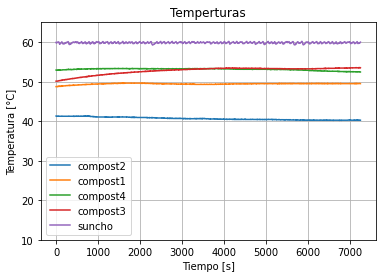

In [13]:
plt.figure("Temperaturas")
plt.title("Temperturas")
plt.plot(tiempos, temp_suncho, '-', markersize=1, label='compost2')
plt.plot(tiempos, temp_compost_1, '-', markersize=1, label='compost1')
plt.plot(tiempos, temp_compost_2, '-', markersize=1, label='compost4')
plt.plot(tiempos, temp_compost_3, '-', markersize=1, label='compost3')
plt.plot(tiempos, temp_compost_4, '-', markersize=1, label='suncho')
plt.legend()
plt.grid()
plt.ylim(10,65)
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/figuras/Temperatura.png")
plt.show()

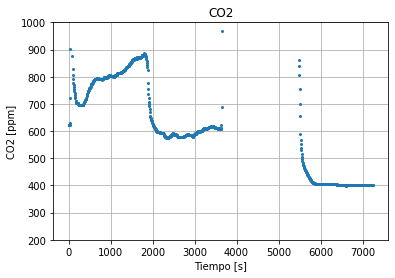

In [15]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos[:20926], co2[:20926], ".",markersize=4)
#for i in range(len(danza)):
#    plt.vlines(x=danza[i], ymin=0, ymax=3000, color="r")
plt.grid()
plt.ylim(200,1000)
#plt.xlim(2000,7500)
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")
#plt.savefig(f"{PATH}/figuras/CO2_completo.png")
plt.show()

# Integración

In [17]:
inicio_x=[] #posición para empezar a medir el área
inicio_y=[]
fin_x=[]
fin_y=[]
for i in range(len(pos) -1):
    inicio_x.append(pos[i] + 60) #dejamos 60 posiciones (5 minutos aprox) de espera
    inicio_y.append(pos[i] + 60) #dejamos 60 posiciones (5 minutos aprox) de espera
    
    fin_x.append(pos[i + 1])
    fin_y.append(pos[i + 1])

#Remuevo los multiplos de 4, porque estarían de más
for i in range(len(pos1[0])-1):
    inicio_x.pop(4 * (i + 1))
    inicio_y.pop(4 * (i + 1))    
    fin_x.pop(4 * (i + 1))
    fin_y.pop(4 * (i + 1))

No handles with labels found to put in legend.


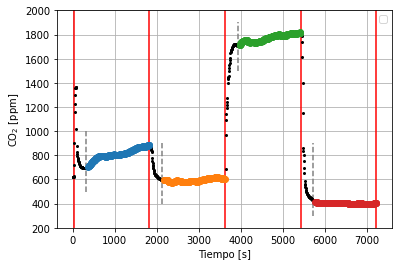

In [38]:
plt.figure("CO2")
#plt.title("CO2 - Area en verde")
plt.plot(tiempos, co2, ".", markersize=4,color='black')
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=3000, color="r")
plt.grid()

plt.vlines(danza[0]+300,ymin=500,ymax=1000,color='grey',linestyles='dashed')
plt.vlines(danza[1]+300,ymin=400,ymax=900,color='grey',linestyles='dashed')
plt.vlines(danza[2]+300,ymin=1500,ymax=1900,color='grey',linestyles='dashed')
plt.vlines(danza[3]+300,ymin=300,ymax=900,color='grey',linestyles='dashed')

plt.ylim(200, 2000)
#plt.xlim(120000,140000)
plt.xlabel("Tiempo [s]")
plt.ylabel("CO$_2$ [ppm]")
#plt.scatter(tiempos[inicio_x], co2[inicio_y], color="m", zorder=4) #marco el inicio de cada área en color magenta
#plt.scatter(tiempos[fin_x], co2[fin_y], color="k", zorder=5) #marco el fin de cada área en color negro

plt.scatter(tiempos[inicio_x[0]:fin_x[0]], co2[inicio_y[0]:fin_y[0]], zorder=3)#,label='Almidón')
plt.scatter(tiempos[inicio_x[1]:fin_x[1]], co2[inicio_y[1]:fin_y[1]], zorder=3)#,label='Celulosa')
plt.scatter(tiempos[inicio_x[2]:fin_x[2]], co2[inicio_y[2]:fin_y[2]], zorder=3)#,label='A + NP TiO$_2$')
plt.scatter(tiempos[inicio_x[3]:fin_x[3]], co2[inicio_y[3]:fin_y[3]], zorder=3)#,label='Blanco')

plt.legend()

plt.show()

In [17]:
#Ahora si, calculo el área:

area = []
for i in range(len(inicio_x)):
    area.append(trapezoid(co2[inicio_y[i]:fin_y[i]], tiempos[inicio_x[i]:fin_x[i]]))
    
print(area)

[1651300.5, 594653.5, 2390724.5, 623648.5, 2301928.0, 565197.0, 2094644.0, 674542.5, 1620841.0, 497178.5, 1750175.5, 622646.5, 1332368.5, 437130.5, 1338732.5, 675373.0, 1418490.0, 483135.5, 1172705.0, 673811.5, 1294032.5, 403823.5, 954019.0, 641095.0]


[988622.0, 588057.0, 972611.0, 637989.5, 1026005.5, 582982.5, 1286449.5, 603635.0, 1006854.5, 564848.0, 1602333.5, 585495.0, 1093228.5, 924567.5, 1522171.5, 1059540.5, 2338944.0, 932278.5, 3925049.5, 905805.5, 1885632.5, 825351.5, 3323029.5, 868526.5, 1497286.0, 719544.5, 2353336.0, 758893.5, 1230042.0, 621363.5, 1809345.0, 618836.0, 938509.5, 452457.5, 1198103.0, 576142.5, 807984.0, 407495.0, 1018620.0, 542761.0, 699564.0, 372488.5, 884154.0, 519564.0]

In [18]:
#Reordeno

area1 = []
area2 = []
area3 = []
area4 = []

for i in range(int(len(area) / 4)):
    area1.append(area[4 * i])
    area2.append(area[4 * i + 1])
    area3.append(area[4 * i + 2])
    area4.append(area[4 * i + 3])

a=np.transpose(np.array([np.arange(1,(int(len(area1)))+1,1),area1,area2,area3,area4]))
np.savetxt(f'{PATH}/figuras/area_{fecha}.csv', a, delimiter=', ', newline='\n', header='nro,Area1,Area2,Area3,Area4')

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

# g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [ ]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(x): #meter el área
    return F * x * 44 / (den * 60)

In [ ]:
gramos(np.array(area1))

In [ ]:
plt.plot(tiempos, co2, ".", markersize=4,color='r',zorder=1)
#plt.errorbar(tiempos[5700:7800], co2[5700:7800], yerr=50+co2[5700:7800]*0.05, fmt='.',zorder=0)
plt.grid(True)
plt.xlim(165000,175000)
plt.ylim(300,1400)
plt.show()

In [ ]:
tiempos[5700:7800]

In [ ]:
plt.errorbar(tiempos, co2, yerr=50+np.array(co2,dtype=float)*0.05, fmt='.',zorder=0)
plt.plot(tiempos, co2, ".", markersize=4,color='r',zorder=1)
plt.grid(True)
#plt.xlim(300,2000)
plt.ylim(300,2000)
plt.show()

In [ ]:
#Busco el promedio pesado
y=co2[inicio_y[0]:fin_y[0]]

In [ ]:
np.sum(y/(50+0.05*y)**2) / (np.sum((50+0.05*y)**-2))

In [ ]:
np.array(co2)

In [ ]:
np.array(co2,dtype=float)*0.05